In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

**五百强数据处理**
* pandas处理数据
* matplotlib**绘图**
* seaborn __美化__
* 首行代码，Jupyter会让图在单元内部显示

In [15]:
df=pd.read_csv("fortune500.csv")
df.head()
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [3]:
df.columns=['year','rank','company','revenue','profit']
len(df)
df.tail()

,year,rank,company,revenue,profit
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [4]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

利润栏有问题，类型object，可能包含非整数数值,字符串

In [5]:
nan_profits=df.profit.str.contains('[^0-9.-]')
df.loc[nan_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [6]:
set(df.profit[nan_profits])

{'N.A.'}

In [7]:
len(df.profit[nan_profits])

369

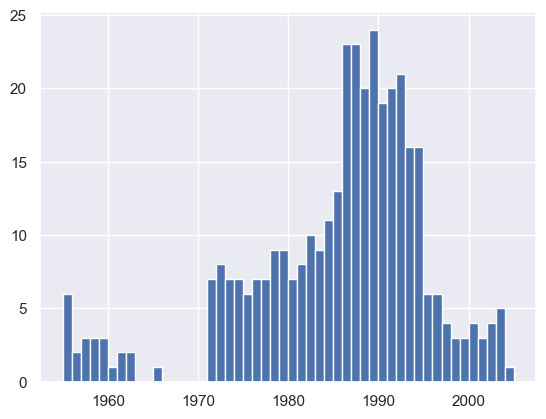

In [8]:
bin_size,_,_=plt.hist(df.year[nan_profits],bins=range(1955,2006))

* 在一年中无效值最多的情况也小于 25，并且由于每年有 500 个数据点，删除这些值在最糟糕的年份中只占不到 4% 的数据
* 除了 90 年代的激增，大多数年份的缺失值还不到峰值的一半
* 假设这是可以接受的，移除这些行

In [9]:
df=df.loc[~nan_profits]
df.profit=df.profit.apply(pd.to_numeric)
len(df)

25131

In [10]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [11]:
group_by_year=df.loc[:,['year','revenue','profit']].groupby('year')
avgs=group_by_year.mean()
x=avgs.index
y1=avgs.profit

def plot(x,y,h,title,ylabel):
    h.set_title(title)
    h.set_ylabel(ylabel)
    h.plot(x,y)
    h.margins(x=0,y=0)

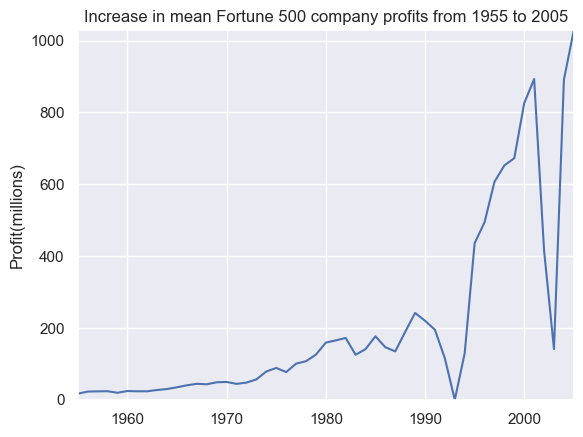

In [12]:
fig,h=plt.subplots()
plot(x,y1,h,'Increase in mean Fortune 500 company profits from 1955 to 2005','Profit(millions)')

* 看起来像一个指数，有一些大的凹陷
* 对应于上世纪 90 年代初的经济衰退和互联网泡沫
* _**为什么每次经济衰退后，利润都能恢复到更高的水平呢?**_

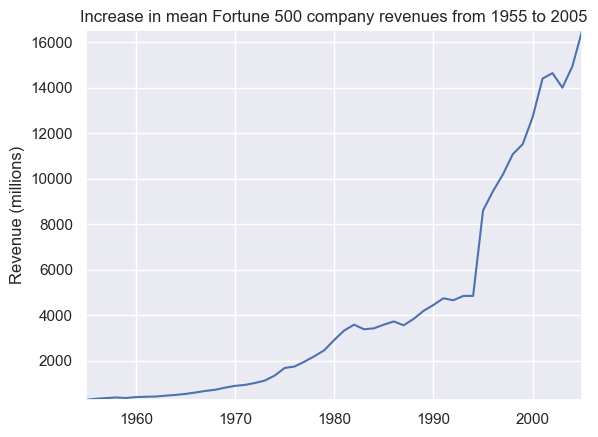

In [13]:
y2=avgs.revenue
fig,h=plt.subplots()
plot(x,y2,h,'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

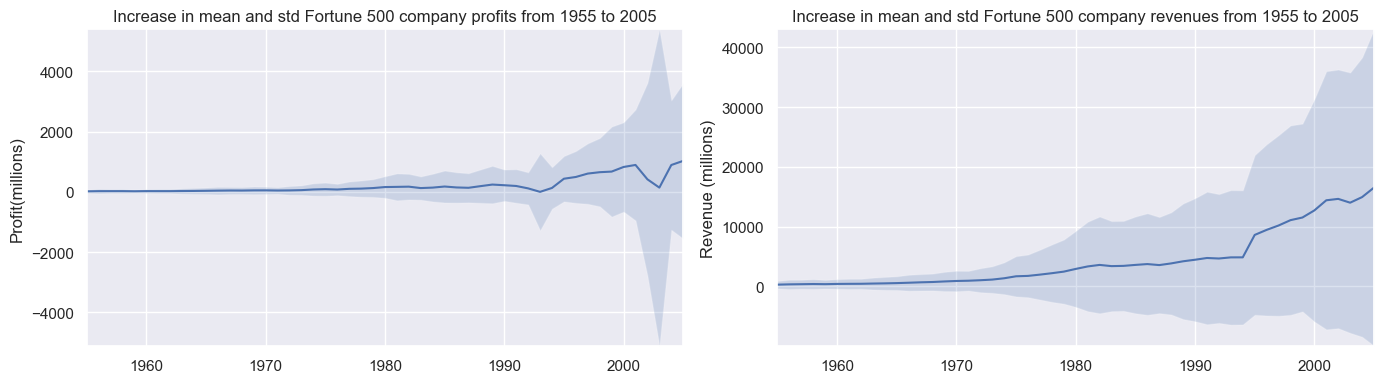

In [14]:
def plot_with_std(x,y,stds,h,title,ylabel):
    h.fill_between(x,y-stds,y+stds,alpha=0.2)
    plot(x,y,h,title,ylabel)

fig,(h1,h2)=plt.subplots(ncols=2)
title= 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1=group_by_year.std().profit.values   #111
stds2=group_by_year.std().revenue.values
plot_with_std(x,y1.values,stds1,h1,title%'profits','Profit(millions)')
plot_with_std(x,y2.values,stds2,h2,title%'revenues','Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()